In [36]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


In [32]:
data = scipy.io.loadmat('concat_fr.mat')
data2 = np.array(data['concat_rate_trials'])

pos_data = scipy.io.loadmat('concat_handpos.mat')
data3 = np.array(pos_data['concat_pos_trials'])


Text(0.5, 1.0, 'Variance explained as function of the number of PCA neural modes')

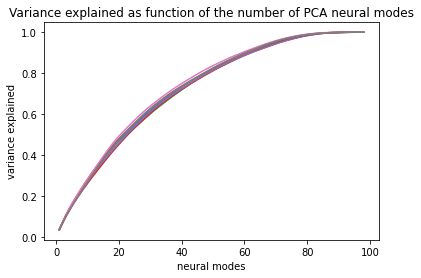

In [21]:
for i in range(8):    
    data = data2[0][i]
    pca = PCA(n_components=98)
    pca.fit(data)

    for i in range(len( pca.explained_variance_ratio_ )):
        if(i == 0):
            pca.explained_variance_ratio_[i] = pca.explained_variance_ratio_[i]
        else:
            pca.explained_variance_ratio_[i] = pca.explained_variance_ratio_[i] + pca.explained_variance_ratio_[i-1]
    t = list(range(1,99))
    plt.plot(t,pca.explained_variance_ratio_, linestyle='solid')
plt.xlabel("neural modes")
plt.ylabel("variance explained")
plt.title("Variance explained as function of the number of PCA neural modes")

In [26]:
data = data2[0][1]
pca = PCA(n_components=60)
pca.fit(data)
comps = pca.components_
comps = np.transpose(comps)
proj = data @ comps

(65750, 60)

In [37]:
pos = data3[0][1]

X_train, X_test, y_train, y_test = train_test_split(proj, pos, test_size=0.2, random_state=42)

model_xgb=XGBoostDecoder(max_depth=3,num_round=200,eta=0.3,gpu=-1) 

NameError: name 'XGBoostDecoder' is not defined